Non-Linear Regression Part 2
========================

<div class="overview-this-is-a-title overview">
<p class="overview-title">Overview</p>
<p>Questions</p>
    <ul>
        <li> How can I perform statistically robust non-linear regression in a Jupyter notebook?</li>
    </ul>
<p>Objectives:</p>
    <ul>
        <li> Import data from a csv file
        <li> Create a function based on the equation to be fitted
        <li> Generate the best-fit curve with parameters and statistical descriptors
        <li> Create plots of the data
    </ul>
</div>

## Something old, something new
Old: import csv data to a pandas dataframe
New: create a function based on an equation
New: use tools in SciPy to fit the data to the function
Old: plot the data to display your results

In [1]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

In [2]:
cd ~/Desktop/python-scripting-biochemistry/

/Users/pac8612/Desktop/python-scripting-biochemistry


### Review the Michaelis-Menten equation

The Michaelis-Menten equation describes kinetics for enzyme-catalyzed reactions. We will use the simplest version of the equation, based on initial reaction velocities with a single substrate.

In our equation,  there are two parameters, V$_{max}$ (maximum velocity) and K$_m$ (the Michaelis constant, which equals the substrate concentration at half maximal velocity), an independent variable, \[S\] = substrate concentration, and a dependent variable, V$_i$, the initial velocity.

$$
V_i = \frac{V_{max} * [S]}{K_m + [S]}
$$

We will use the following variables for our equation:

- Vmax = the maximum velocity
- Km = the Michaelis constant
- SubConc = substrate concentration
- Vi = initial velocity

In [3]:
# create the filehandle
datafile = os.path.join('biochemist-python', 'chapters', 'data', 'MM_data.csv')
# import the data
rates_df = pd.read_csv(datafile)
rates_df # inspect the data to make sure you have substrate concentrations and initial velocities

,pNPP (mM),slopes,initial velocities
0,20.00,0.514091,34.272718
1,10.00,0.503140,33.542678
2,7.00,0.470435,31.362310
3,4.00,0.417021,27.801416
4,2.00,0.342445,22.829652
5,1.00,0.246260,16.417302
6,0.70,0.202843,13.522863
7,0.40,0.136443,9.096204
8,0.20,0.076442,5.096143
9,0.10,0.078070,5.204653


In [4]:
# define the function
def MM(SubConc, Vmax, Km):
    Vi = (Vmax * SubConc)/(Km + SubConc)
    return Vi
# set the data
ydata = rates_df['initial velocities']
xdata = rates_df['pNPP (mM)']
rates_df

,pNPP (mM),slopes,initial velocities
0,20.00,0.514091,34.272718
1,10.00,0.503140,33.542678
2,7.00,0.470435,31.362310
3,4.00,0.417021,27.801416
4,2.00,0.342445,22.829652
5,1.00,0.246260,16.417302
6,0.70,0.202843,13.522863
7,0.40,0.136443,9.096204
8,0.20,0.076442,5.096143
9,0.10,0.078070,5.204653


In [5]:
ydata = rates_df('initial velocities') # Common errors and how to read them
# If the errors says "is not callable", you are using parentheses (which call a function) when you should not

TypeError: 'DataFrame' object is not callable

In [6]:
MM(rates_df['pNPP (mM)'], 100, 1)

0     95.238095
1     90.909091
2     87.500000
3     80.000000
4     66.666667
5     50.000000
6     41.176471
7     28.571429
8     16.666667
9      9.090909
10     4.761905
Name: pNPP (mM), dtype: float64

In [7]:
MM(rates_df['pNPP (mM)'], 100, 10)

0     66.666667
1     50.000000
2     41.176471
3     28.571429
4     16.666667
5      9.090909
6      6.542056
7      3.846154
8      1.960784
9      0.990099
10     0.497512
Name: pNPP (mM), dtype: float64

In [ ]:
# Common Errors - color coding and common features of Jupyter notebooks
# str
# def
# import
# 1s
# In [20]

In [15]:
parameters, covariance = curve_fit(MM, xdata, ydata)

In [16]:
fit_A = parameters[0]
fit_B = parameters[1]
print(fit_A)
print(fit_B)

36.657348357808445
1.192632242867685


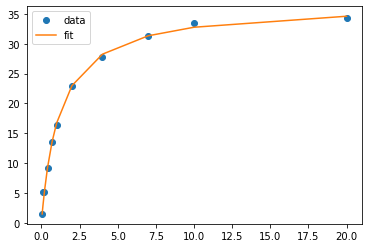

In [17]:
fit_y = MM(xdata, fit_A, fit_B)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()

In [ ]:
# Errors on the parameters

In [ ]:
# Now improve the plot with seaborn